# Clustering con DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de agrupamiento que se utiliza para identificar clusters densos de puntos en un espacio n-dimensional. En contraposición a k-means, basado en centroides, DBSCAN no requiere que se especifiquen el número de clusters de antemano.

El algoritmo DBSCAN se basa en la idea de que los puntos que se encuentran cerca unos de otros en un espacio n-dimensional tienden a pertenecer al mismo cluster, mientras que los puntos aislados o solitarios se consideran ruido o "outliers".

El algoritmo DBSCAN funciona de la siguiente manera:

- Selecciona un punto arbitrario en el conjunto de datos y encuentra todos los puntos que están a una distancia máxima eps (llamada vecindad eps) de este punto.

- Si el número de puntos dentro de la vecindad eps es mayor o igual a min_samples, se considera un cluster. Todos los puntos dentro de la vecindad eps se agregan a este cluster. Si el número de puntos dentro de la vecindad eps es menor que min_samples, el punto se considera ruido o "outlier".

- Repite los pasos 1 y 2 para todos los puntos del conjunto de datos hasta que se hayan visitado todos los puntos.

- Si dos clusters se superponen, se fusionan en un solo cluster. Esto se hace iterativamente hasta que no haya más fusiones posibles.

https://en.wikipedia.org/wiki/DBSCAN

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

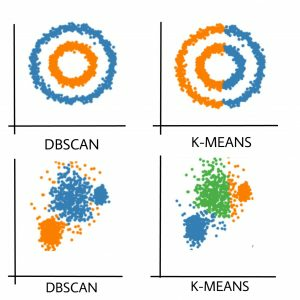

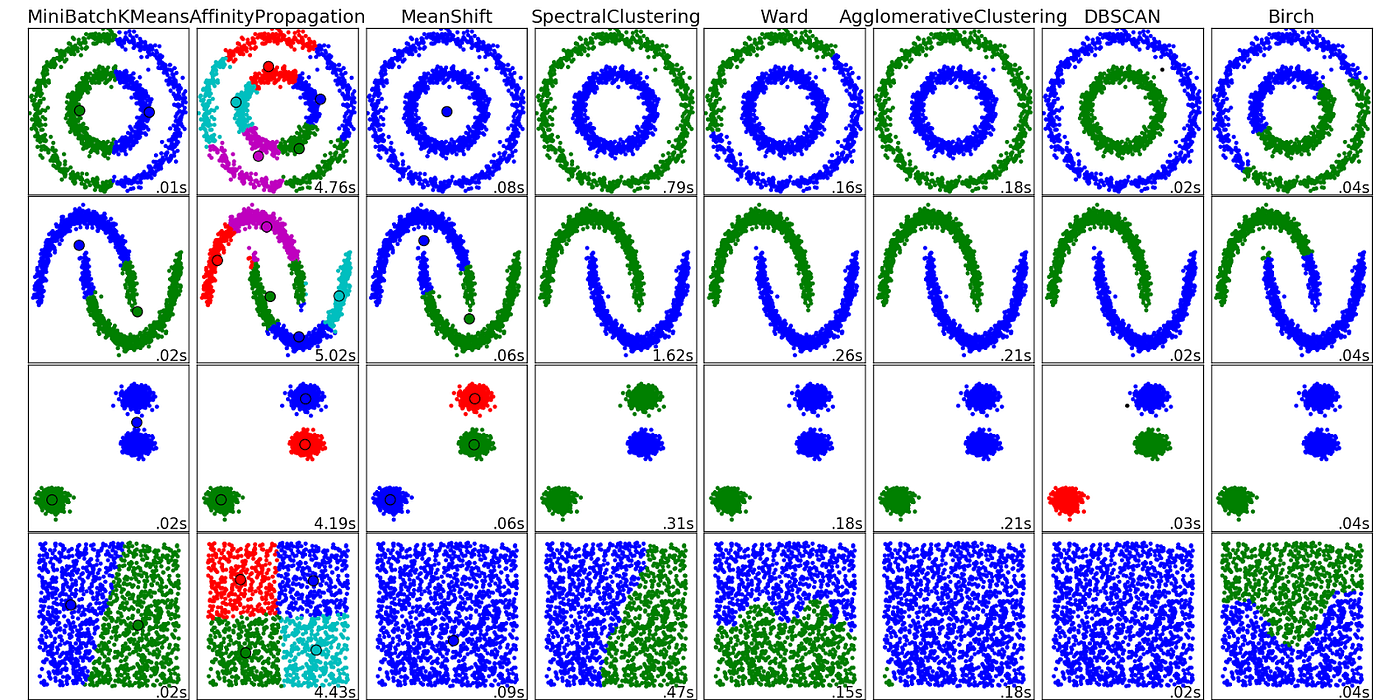

***

## Importamos las librerías y generamos el dataset

In [2]:
# importamos la librería para generar el data set de las lunas
from sklearn.datasets import make_moons

# Analisis numérico
import numpy as np

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler

# Importamos los algoritmos de clasificación de Sklearn
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# librería de gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

La función **make_moons** es una función proporcionada por la librería scikit-learn de Python que se utiliza para generar datos simulados en forma de dos semicírculos intercalados. La función toma varios argumentos que permiten controlar las características de los datos generados, como el número de puntos, el ruido en los datos y la distancia entre los dos semicírculos.

La función make_moons es útil para generar datos de prueba para algoritmos de clasificación binaria, ya que los datos generados tienen una estructura compleja pero bien definida que puede ser difícil de clasificar para algunos algoritmos, como k-means.

In [3]:
# Generamos el dataset
X, label = make_moons(n_samples=400, noise=0.07, random_state=19)
print(X[:5,])

[[-0.32858829  0.87217196]
 [ 0.94493253 -0.52862798]
 [-0.88914256  0.2766356 ]
 [ 0.67797712 -0.44767333]
 [ 1.37057962 -0.48283739]]


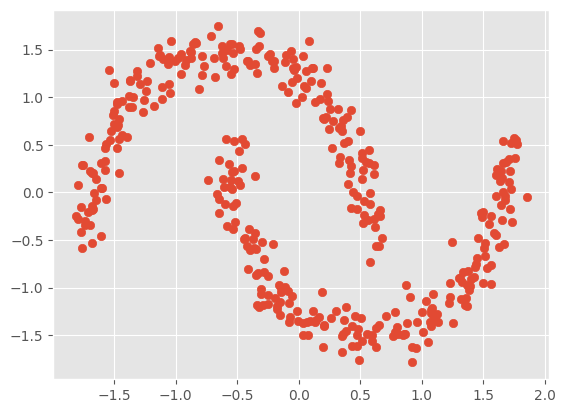

In [21]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
# Normalizamos los datos
X_sinNormalizar = X
X = StandardScaler().fit_transform(X)

In [6]:
print(X[:5,])

[[-0.96028459  1.23971879]
 [ 0.51506244 -1.56178944]
 [-1.60967489  0.04868502]
 [ 0.20580023 -1.39988542]
 [ 1.00816563 -1.47021124]]


/tmp/ipykernel_21348/3777728977.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


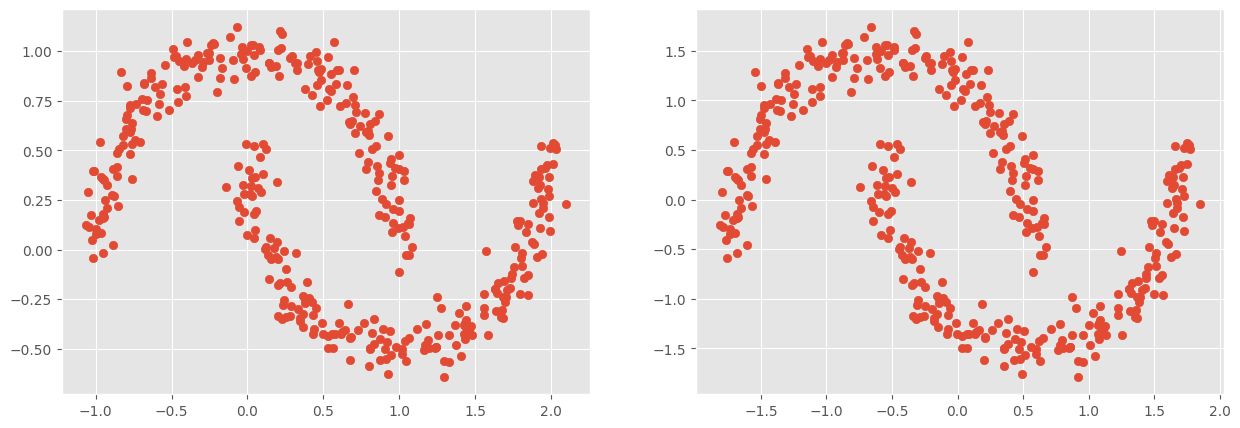

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.scatter(X_sinNormalizar[:,0], X_sinNormalizar[:,1])

plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1])

plt.show()

El código **plt.subplot(1, 2, 1)** se utiliza en la biblioteca Matplotlib de Python para crear un gráfico con múltiples subtramas.

En este caso, la función subplot() está siendo utilizada para crear una trama que consiste en dos subtramas colocadas una al lado de la otra. Los dos primeros argumentos de subplot() indican que habrá una única fila de subtramas y dos columnas de subtramas. El tercer argumento indica que nos estamos refiriendo a la primera subtrama (en una secuencia de subtramas numeradas de izquierda a derecha, de arriba hacia abajo).

plt.subplot(1, 2, 1) se refiere a la primera subtrama y para dibujar algo en la segunda subtrama, usamos plt.subplot(1, 2, 2).

/tmp/ipykernel_21348/2120309591.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sctr = ax.scatter(X[:,0],X[:,1], c='lightblue', edgecolor='black', s=40, alpha=0.9, cmap=plt.cm.Set1)


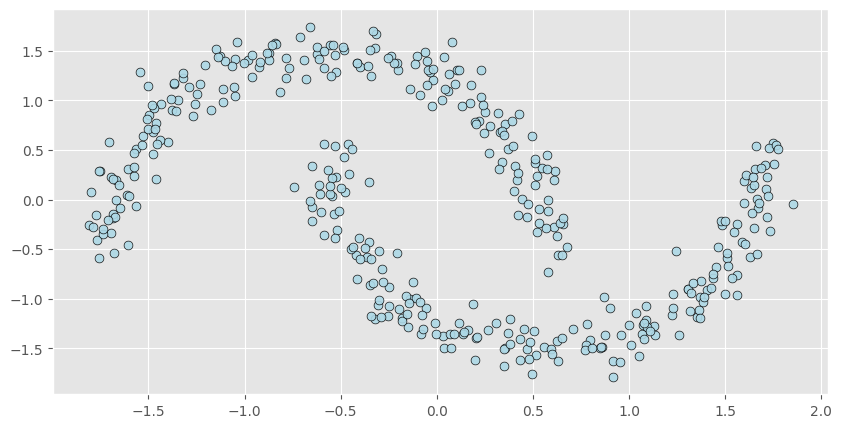

In [8]:
# Visualizamos el dataset
fig, ax = plt.subplots(figsize=(10,5))
sctr = ax.scatter(X[:,0],X[:,1], c='lightblue', edgecolor='black', s=40, alpha=0.9, cmap=plt.cm.Set1)

***

## Clustering con K-Means

In [9]:
# Instanciamos el modelo y corremos el método fit.predict para obtener los clusters
# Como sabemos que son 2 lunas, seteamos el parámetro k = 2
km = KMeans(n_clusters=2, random_state=19)
y_km = km.fit_predict(X)

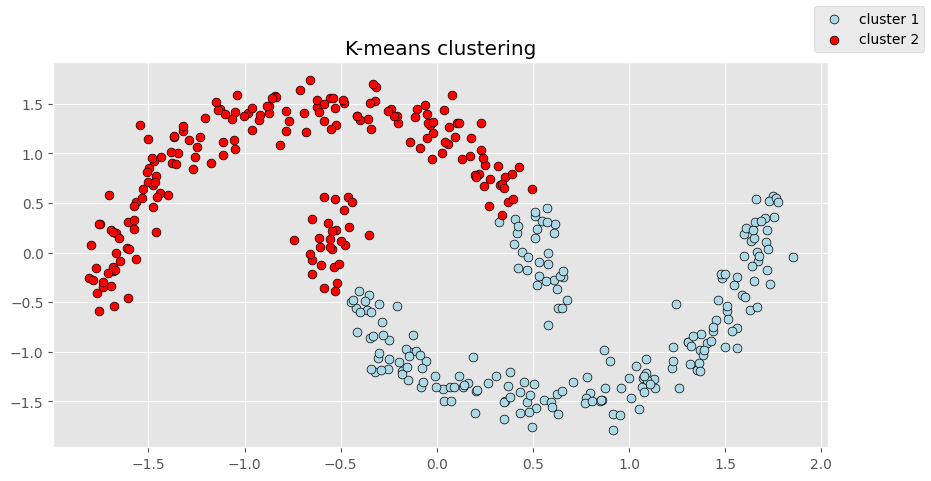

In [10]:
# Visualizamos los clusters generador por K-Means
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X[y_km==0,0], X[y_km==0,1],c ='lightblue', edgecolor='black', marker='o',s=40, label='cluster 1')
ax.scatter(X[y_km==1,0], X[y_km==1,1],c ='red', edgecolor='black', marker='o',s=40, label='cluster 2')
ax.set_title('K-means clustering')
fig.legend();

***

## Clustering con DBSCAN

In [11]:
# Instanciamos el modelo y corremos el método fit.predict para obtener los clusters
# Seteamos los valores eps y min_samples
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

eps y min_samples son los hiperparámetros de DBSCAN que definen la densidad y el tamaño mínimo de un cluster.

- eps: es la distancia máxima entre dos muestras para que se consideren vecinos. Es decir, si la distancia entre dos puntos es menor o igual a eps, se consideran vecinos y se encuentran dentro del mismo cluster. Los puntos que no tienen suficientes vecinos dentro de eps se consideran puntos de ruido o "outliers". Por lo tanto, eps controla la compacidad de los clusters.

- min_samples: es el número mínimo de muestras requeridas para formar un cluster. Si una región tiene al menos min_samples muestras dentro de una distancia de eps, se considera un cluster válido. Si el número de muestras dentro de una región es menor que min_samples, entonces esa región se considera como ruido. Por lo tanto, min_samples controla la densidad de los clusters.

In [12]:
# Vemos las etiquetas (-1 significa que el punto es "ruido")
y_dbscan

array([ 0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,
        1,  1,  0,  1,  0,  1,  1, -1,  0,  1,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,
        0,  1,  1,  0,  1,  1,  0,  1,  0,  0, -1,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,
        0,  1,  1,  1,  0

In [13]:
# Lista de los puntos core y máscara para graficar
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 18

In [14]:
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [15]:
# Calculamos la cantidad de clusters generados
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_clusters_

2

Text(0.5, 1.0, 'Estimated number of clusters: 2')

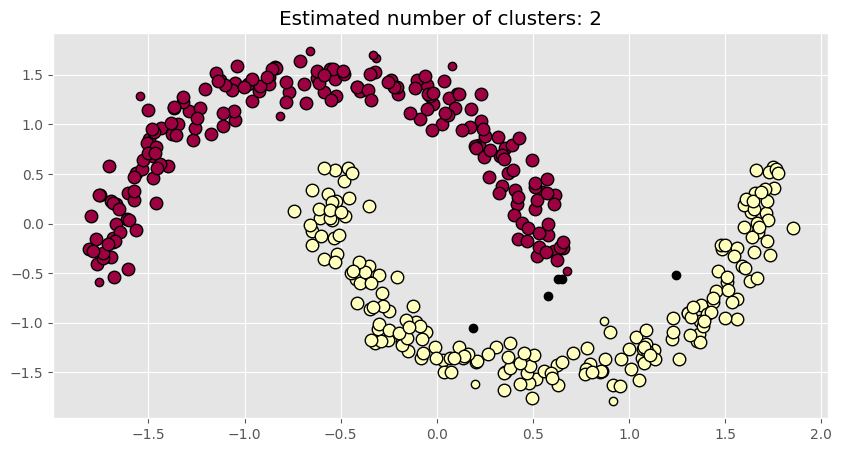

In [16]:
# Graficamos
unique_labels = set((y_dbscan))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=[10,5])
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (y_dbscan == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=9)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

***

## Evaluamos el rendimiento (performance) de DBSCAN

El **índice de Calinski-Harabasz** (también conocido como el criterio de relación de varianza) es una medida utilizada para evaluar la eficacia de los algoritmos de clustering. Se calcula como una relación de la dispersión entre grupos y la dispersión dentro de los grupos. Cuanto mayor sea el valor del índice Calinski-Harabasz, mejor es la partición (cluster), ya que esto indica una mayor separación entre las instancias (observaciones) de diferentes grupos y una menor dispersión dentro de cada grupo. El índice se utiliza comúnmente como una medida de validación interna para comparar diferentes agrupamientos (clustering).

El **coeficiente de Silhouette** es una medida de la calidad de una partición (cluster) de datos. Se calcula para cada instancia (observación) en la partición y mide la similitud respecto a su propio grupo (cluster) en comparación con la similitud frente a otros grupos (clusters). El valor del coeficiente de Silhouette varía en un rango de -1 a 1, donde valores más cercanos a 1 indican que la partición es adecuada. Un valor negativo indica que una instancia puede estar en el cluster equivocado. La interpretación del valor del coeficiente de Silhouette es la siguiente:

- Valores cercanos a 1: excelente partición

- Valores cercanos a 0: partición aceptable

- Valores cercanos a -1: mala partición

In [17]:
# Importamos la librería de métricas
from sklearn import metrics

In [18]:
def eval_clust_per(X, labels):
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X, labels))

In [19]:
eval_clust_per(X, y_dbscan)

Silhouette Coefficient: 0.054
Calinski-Harabasz Index: 177.500


Silhouette score calcula lo compacto de un cluster, cuanto más alto mejor, con 1 como valor más alto.

El problema es que Silhouette no evalúa bien las formas complejas. En este caso arroja un mal score, cuando la clusterización es perfecta. De hecho, el score de K-Means es mejor. Lo mismo sucede con el Calinski-Harabasz Index.

In [20]:
eval_clust_per(X, y_km)

Silhouette Coefficient: 0.500
Calinski-Harabasz Index: 562.689


***

### ¿Cómo resolvemos la definición de los **hiperparámetros** en DBSCAN?

No hay una respuesta única. Posibles caminos:

1. Con conocimiento del tema de análisis.

2. Hacer un análisis previo de la densidad del data set.